In [220]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from PIL import Image
from scipy import sparse
from scipy.sparse import diags
from scipy.sparse.linalg import factorized

In [221]:
xi, xf, dx = 0, 2*np.pi, 1e-2
ti, tf, dt = 0, 1, 1e-3

x = np.arange(xi, xf+dx, dx)
t = np.arange(ti, tf+dt, dt)

Nt, Nx = len(t), len(x)

def u0(x):
    return np.sin(x)

def D_t(t):
    D = 1/(2*dx) * diags([-1, 0, 1], [-1, 0, 1], shape=(Nx, Nx)).toarray()
    if c > 0:
        D[0, [0, 1, 2]] = [-1/dx, 1/dx, 0]
        D[-1, [-3, -2, -1]] = [0, -1/dx, 0]
    return sparse.csr_matrix(D)

c = 2*np.pi
u = np.zeros((Nt, Nx))
I = diags([1], [0], shape=(Nx, Nx))



In [ ]:
for j, tj in enumerate(t):
    if j == 0:
        u[0, :] = u0(x)
    else:
        A = (I - dt*c/2 * D_t(tj))
        B = (I + dt*c/2 * D_t(t[j-1]))
        solve = factorized(A.tocsc())
        uj = u[j-1, :]
        u[j, :] = solve(B @ uj)
    
    if np.max(np.abs(u[j, :])) > 1e2:
        print(f"Blow up at time {tj:.3f}s")
        break
    
    if j % int(1/dt * 1e-1) == 0:
        print(f"Time {tj:.3f}s, u_max = {np.max(np.abs(u[j, :])):.3f}")


Time 0.000s, u_max = 1.000


In [ ]:
def save_gif_PIL(outfile, files, fps=5, loop=0):
    "Helper function for saving GIFs"
    imgs = [Image.open(file) for file in files]
    imgs[0].save(fp=outfile, format='GIF', append_images=imgs[1:], save_all=True, duration=int(1000/fps), loop=loop)

def make_plot(save=False, file_name=f"PDE_solution.png"):
    "Helper function for plotting"
    fig, ax = plt.subplots()
    ax.plot(x, u[i, :])
    ax.set_xlim(xi, xf)
    ax.set_ylim(-1.05, 1.05)
    ax.grid()
    ax.set_title(f"Time = {t[i]:.3f}s")
    if save:
        fig.savefig(file_name, bbox_inches="tight", pad_inches=0.1, dpi=100, facecolor="white")

In [ ]:
import os
import shutil

folder_path="plots"
for item in os.listdir(folder_path):
    item_path = os.path.join(folder_path, item)
    try:
        if os.path.isfile(item_path) or os.path.islink(item_path):
            os.unlink(item_path)  # Remove file or symbolic link
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)  # Remove subdirectory and its contents
    except Exception as e:
        print(f"Failed to delete {item_path}. Reason: {e}")

KeyboardInterrupt: 

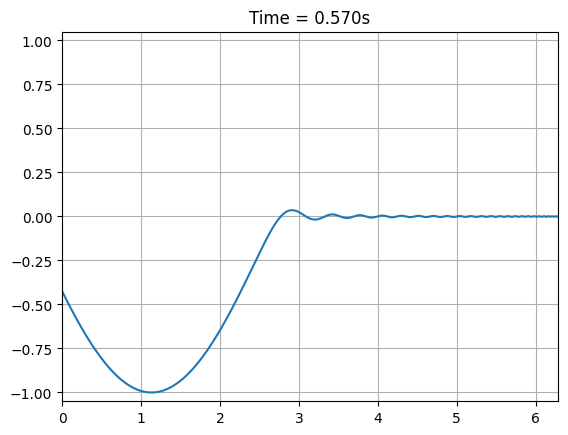

In [ ]:
files = []
fps   = 20
frame_indicies = np.linspace(0, Nt-1, int(fps*tf), dtype=int)
for i in frame_indicies:
    ti = t[i]
    file = f"plots/PDE_sol_{ti:.5f}.png"
    make_plot(save=True, file_name=file)
    files.append(file)
    plt.close("all")
    
save_gif_PIL("PDE_solution.gif", files, fps=fps, loop=0)